# **Análisis exploratorio y estadística**

# AE02 - Introducción a Conceptos y Visualizacion Estadística - Parte 2


## <font color='blue'>**Introduccion**</font>


**¿Qué es el análisis de datos exploratorios?**

Análisis de datos exploratorios o (EDA) es comprender los conjuntos de datos resumiendo sus características principales, a menudo trazándolos visualmente y utilizando descriptores estadisticos. Este paso es muy importante especialmente cuando llegamos a modelar los datos para aplicar el aprendizaje automático. El trazado en EDA consta de histogramas, boxplots, diagrama de dispersión y muchos más. A menudo se necesita mucho tiempo para explorar los datos. A través del proceso de EDA, podemos solicitar definir el enunciado del problema o la definición en nuestro conjunto de datos, lo cual es muy importante.

**¿Cómo realizar análisis de datos exploratorios?**

Esta es una de esas preguntas que todos están interesados en conocer la respuesta. Bueno, la respuesta asi como en cualquier proyecto de ciencia de datos,  es que depende del conjunto de datos en el que esté trabajando. No existe un método o métodos comunes para realizar EDA, sin embargto en este notebook se puede comprender algunos métodos y gráficos frecuentes que se utilizarían en el proceso de EDA.

**¿Qué datos estamos explorando hoy?**

El primer conjunto de datos que exploraremos es sobre autors. El conjunto de datos se puede descargar desde [aquí] (https://www.kaggle.com/CooperUnion/cardataset). Para dar una breve información sobre el conjunto de datos, estos datos contienen más de 10.000 filas y más de 10 columnas que contienen características del automóvil como el tipo de combustible del motor, HP del motor, tipo de transmisión, MPG en carretera, MPG en ciudad y muchos más. más. Entonces, en este tutorial, exploraremos los datos y los prepararemos para el modelado.



---



## <font color='blue'>**Importando las librerias necesarias**</font>

Usdualmente para realizar EDA, necesitaremos 4 librerias. La libreria numpy para todo lo que necesitemos realizar con matrices y algebra lineal. Pandas para realizar el procesamniento del dataset, ordenarlo agruparlo, integrarlo con otro dataset o filtrarlo. Todo el proceso de visualización, utilizaremos principalemnte dos librerias seaborn y matplotlib. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns                       #Visualizacion
import matplotlib.pyplot as plt             #visualization
%matplotlib inline     




---



## <font color='blue'>**Vamos a cargar los datos**</font>


Cargar los datos en un dataframe de pandas es sin duda uno de los pasos importantes en EDA, en este caso podemos ver que el valor del conjunto de datos está separado por comas. 

In [2]:
# Con esto debe dar permiso a google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Aqui debe cargar su ruta
path = '/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/'
df = pd.read_csv(path + "data.csv")
# despleguemos las primeras 10 columnas, transpuestas
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
Make,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011,2012,2012,2012,2012,2013
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335,300,300,230,230,230,300,300,230,230
Engine Cylinders,6,6,6,6,6,6,6,6,6,6
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2,2,2,2,2,2,2,2,2,2
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury,"Luxury,Performance","Luxury,Performance","Luxury,High-Performance",Luxury,Luxury


In [4]:
df.tail(5)                        

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995




---



## <font color='blue'>**Verificando el tipo de dato**</font>


Aquí verificamos los tipos de datos, porque a veces algunos atributos no se almacenan con el tipo de dato correcto. Esto es importante al momento de realizar las visualizaciones. Al realizar la comnparacion con los datos vemos que se han cargado de forma correcta. 

In [6]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object



---



## <font color='blue'>**Renombrando columnas**</font>

En este caso, la mayoría de los nombres de las columnas son muy confusos de leer, así que es mejor modificar los nombres de las columnas. 

In [7]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df = df.drop(['Market Category'], axis=1)
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500




---



## <font color='blue'>**Eliminando filas duplicadas**</font>

Esto suele ser algo útil porque un conjunto de datos enorme, como en este caso contiene más de 10.000 filas, a menudo tiene algunos datos duplicados que pueden ser molestos, por lo que aquí elimino todo el valor duplicado del conjunto de datos. 

In [8]:
df.shape

(11914, 15)

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("Numero de filas duplicadas: ", duplicate_rows_df.shape)

Numero de filas duplicadas:  (720, 15)


In [10]:
df.count()      

Make                11914
Model               11914
Year                11914
Engine Fuel Type    11911
HP                  11845
Cylinders           11884
Transmission        11914
Drive Mode          11914
Number of Doors     11908
Vehicle Size        11914
Vehicle Style       11914
MPG-H               11914
MPG-C               11914
Popularity          11914
Price               11914
dtype: int64

In [11]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


In [12]:
df_copy = df
df.count()

Make                11194
Model               11194
Year                11194
Engine Fuel Type    11191
HP                  11125
Cylinders           11164
Transmission        11194
Drive Mode          11194
Number of Doors     11188
Vehicle Size        11194
Vehicle Style       11194
MPG-H               11194
MPG-C               11194
Popularity          11194
Price               11194
dtype: int64



---



## <font color='blue'>**Valores nulos**</font>

Este es un paso importante también y existen distintos métodos de completar los datos faltantes. Cuando el porcentaje de datos nulos es bajo, uno puede probar eliminando los registros y evaluar si es que algunos de los eliminados son relevantes. En caso de no eliminar los registros las formas más frecuentes de agregar un valor es incoprporar la media, mediana, sobre el total de la problación y respecto de un número de vecinos cercanos.  En este caso como son pocos valores, estos serán eliminados. 

**Nota**: Utilizaremos la librería ***Missingno***, la cual es una excelente biblioteca de Python, fácil de usar, y que proporciona una serie de visualizaciones para comprender la presencia y distribución de los datos faltantes dentro de un marco de datos de pandas. Esto puede ser en forma de gráfico de barras, gráfico de matriz, mapa de calor o dendrograma.

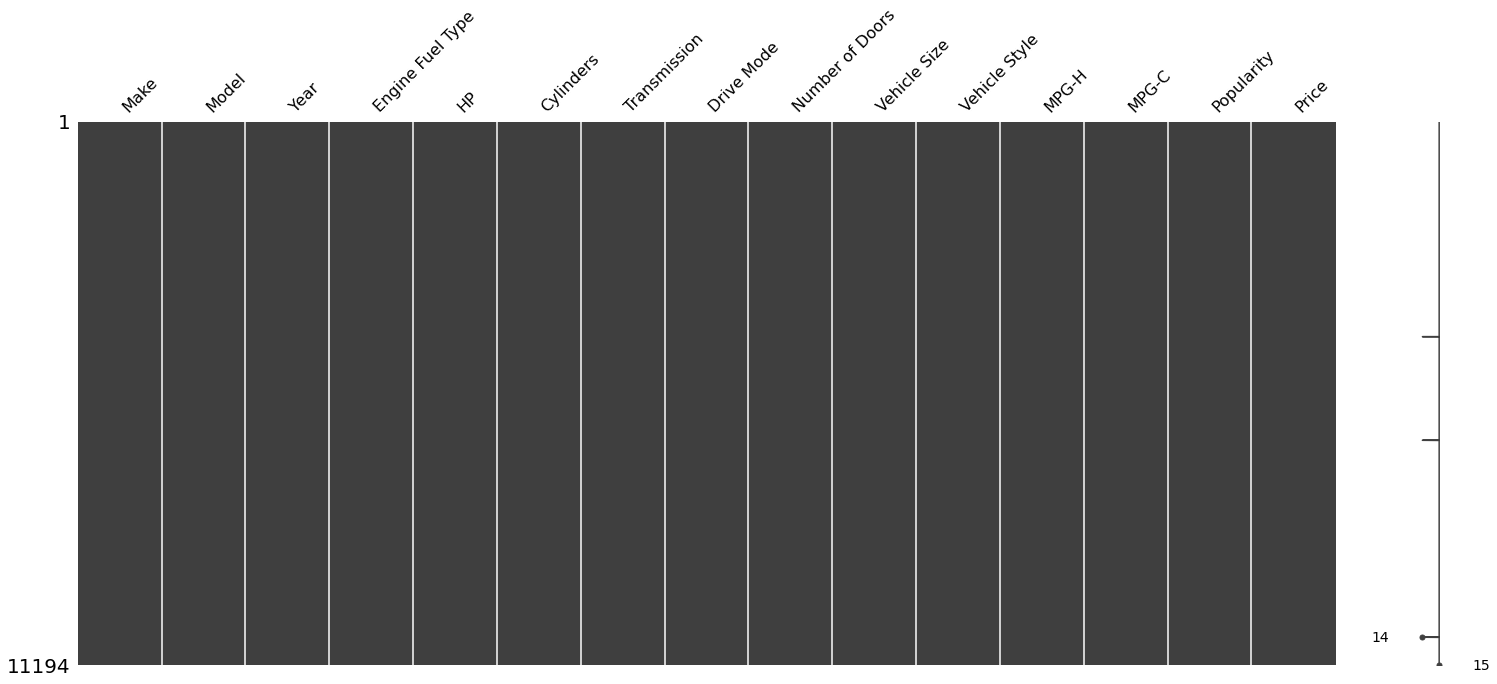

In [27]:
import missingno as msno
%matplotlib inline
msno.matrix(df)
plt.show()

In [28]:
print(df.isnull().sum())

Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     6
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


In [29]:
df = df.dropna()    # Borrando los valores nulos ya que son pocos. 
df.count()

Make                11185
Model               11185
Year                11185
Engine Fuel Type    11185
HP                  11185
Cylinders           11185
Transmission        11185
Drive Mode          11185
Number of Doors     11185
Vehicle Size        11185
Vehicle Style       11185
MPG-H               11185
MPG-C               11185
Popularity          11185
Price               11185
dtype: int64

Verifiquemos que no existan valores nulos

In [30]:
print(df.isnull().sum())   

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


## <font color='green'>**Actividad 1**</font>

Realice una imputación de datos utilizando la media para las variables 'HP' y 'Cylinders'. 

In [13]:
# Tu códugo aquí ...
HP_mean         = df_copy['HP'].mean()
Cylinders_mean  = df_copy['Cylinders'].mean()
print(f'La media de HP en el dataset es {HP_mean: 2.2f}')
print(f'La media de Cylinders en el dataset es {Cylinders_mean: 2.2f}')

df_copy['HP'].fillna(HP_mean, inplace=True)
df_copy['Cylinders'].fillna(Cylinders_mean, inplace=True)


La media de HP en el dataset es  253.39
La media de Cylinders en el dataset es  5.67


In [14]:
#verifiquemos que no haya valores nulos en Cylinders y HP
print(df_copy.isnull().sum())   

Make                0
Model               0
Year                0
Engine Fuel Type    3
HP                  0
Cylinders           0
Transmission        0
Drive Mode          0
Number of Doors     6
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64


<font color='green'>Fin Actividad 1</font>



---



## <font color='blue'>**Detectando outliers**</font>

Un valor atípico es un punto o conjunto de puntos que son diferentes de otros puntos. A veces pueden ser muy altos o muy bajos. A menudo, es una buena idea detectar y eliminar los valores atípicos.  Cuando se quieren analizar comportamientos frecuentes y obtener información de éstos, es una buena idea eliminar los puntos atípicos. En este caso utilizaremo el rango intercuartílico para realizar la detección y eliminación de valores atípicos. No es la única forma, pero se utiliza fecuentemente. Una técnica multidimensional para eliminar puntos atípicos es [db-scan](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html).  

Cuando realizamos un análisis univariado, frecuentemente, los valores atípicos se pueden ver con visualizaciones usando un box plot. A continuación, se muestra el box plot de MSRP, cilindros, caballos de fuerza y tamaño del motor. 

Puede probar otros también.


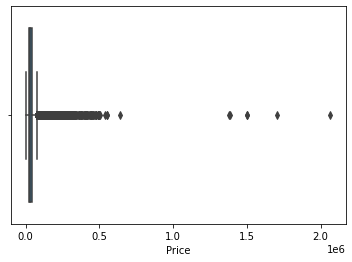

In [31]:
sns.boxplot(x=df['Price']); # Añadimos un punto y coma para eliminar
                            # texto no deseado en la salida

In [ ]:
fabricantes = df.Make.unique()
print(len(fabricantes))

48


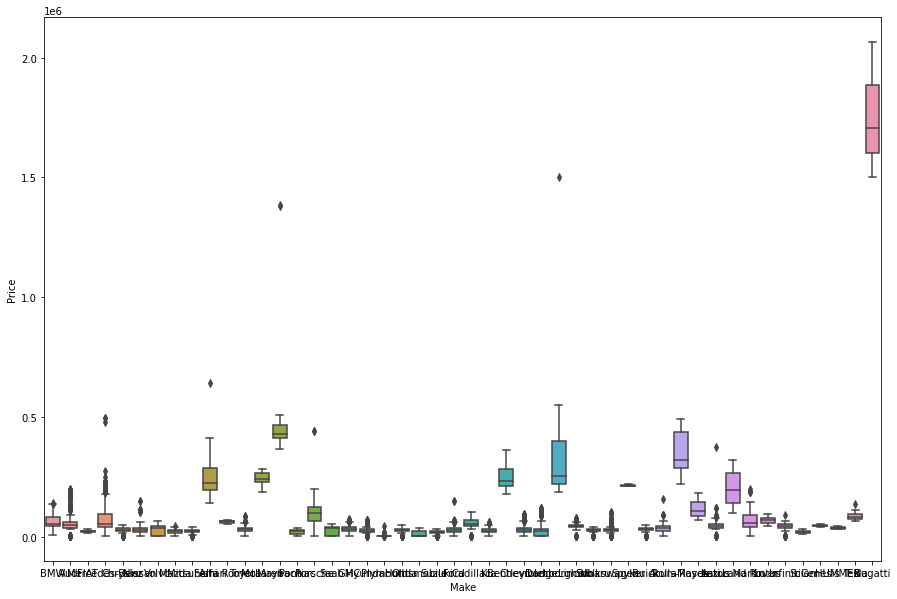

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(15,10))

sns.boxplot(data=df, x='Make', y='Price'); # Añadimos un punto y coma para eliminar
                            # texto no deseado en la salida

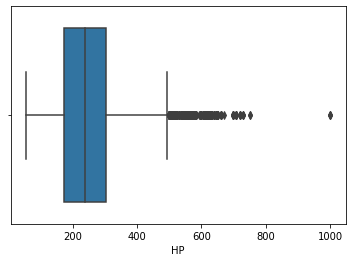

In [ ]:
sns.boxplot(x=df['HP'])

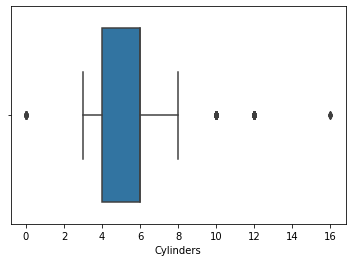

In [ ]:
sns.boxplot(x=df['Cylinders'])

In [32]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
values = zip(Q1.index, Q1, Q3, IQR)
print(f'{"Atributo":20}{"Q1":>10}{"Q2":>10}{"IQR":>10}')
print('-'*50)
for i in values:
    print(f'{i[0]:20}{i[1]:10.1f}{i[2]:10.1f}{i[3]:10.1f}')

Atributo                    Q1        Q2       IQR
--------------------------------------------------
Year                    2007.0    2016.0       9.0
HP                       172.0     303.0     131.0
Cylinders                  4.0       6.0       2.0
Number of Doors            2.0       4.0       2.0
MPG-H                     22.0      30.0       8.0
MPG-C                     16.0      22.0       6.0
Popularity               549.0    2009.0    1460.0
Price                  21600.0   43020.0   21420.0


## <font color='green'>**Actividad 2**</font>
### Eliminando outliers

Elimine los puntos atípicos y desarrolle las mismas visualizaciones anteriores. Compárelas.

In [33]:
# Tu código aquí ...
out_inf = Q1 - 1.5 * IQR
out_inf

Year                1993.5
HP                   -24.5
Cylinders              1.0
Number of Doors       -1.0
MPG-H                 10.0
MPG-C                  7.0
Popularity         -1641.0
Price             -10530.0
dtype: float64

In [34]:
# Calcula el límite superior
out_sup = Q1 + 1.5 * IQR
out_sup

Year                2020.5
HP                   368.5
Cylinders              7.0
Number of Doors        5.0
MPG-H                 34.0
MPG-C                 25.0
Popularity          2739.0
Price              53730.0
dtype: float64

In [72]:
# Debemos alinear las columnas del DataFrame con el índice de la Serie
a1, a2 = df.align(out_inf, axis=1, copy=False)

In [73]:
a1.sample(5)

,Cylinders,Drive Mode,Engine Fuel Type,HP,MPG-C,MPG-H,Make,Model,Number of Doors,Popularity,Price,Transmission,Vehicle Size,Vehicle Style,Year
7895,8.0,rear wheel drive,premium unleaded (required),523.0,15,22,Maserati,Quattroporte,4.0,238,145500,AUTOMATIC,Large,Sedan,2017
5876,4.0,all wheel drive,regular unleaded,148.0,28,37,Subaru,Impreza,4.0,640,21095,AUTOMATIC,Compact,Sedan,2016
285,6.0,rear wheel drive,regular unleaded,306.0,17,24,Nissan,350Z,2.0,2009,31210,AUTOMATIC,Compact,Coupe,2008
2867,8.0,all wheel drive,premium unleaded (required),500.0,15,25,Bentley,Continental GT,2.0,520,187900,AUTOMATIC,Midsize,Coupe,2015
4531,6.0,four wheel drive,flex-fuel (unleaded/E85),282.0,17,23,Ford,F-150,4.0,5657,36565,AUTOMATIC,Large,Crew Cab Pickup,2016


In [74]:
# Verificamos que las columnas de a1 son las mismas que el indice de a2
print(a1.columns)
print(a2.index)

a1.columns == a2.index

Index(['Cylinders', 'Drive Mode', 'Engine Fuel Type', 'HP', 'MPG-C', 'MPG-H',
       'Make', 'Model', 'Number of Doors', 'Popularity', 'Price',
       'Transmission', 'Vehicle Size', 'Vehicle Style', 'Year'],
      dtype='object')
Index(['Cylinders', 'Drive Mode', 'Engine Fuel Type', 'HP', 'MPG-C', 'MPG-H',
       'Make', 'Model', 'Number of Doors', 'Popularity', 'Price',
       'Transmission', 'Vehicle Size', 'Vehicle Style', 'Year'],
      dtype='object')


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [75]:
# Nuestro df es ahora a1
# lo alineamos con out_sup
a3, a4 = a1.align(out_sup, axis=1, copy=False)

In [77]:
a3.sample(5)

,Cylinders,Drive Mode,Engine Fuel Type,HP,MPG-C,MPG-H,Make,Model,Number of Doors,Popularity,Price,Transmission,Vehicle Size,Vehicle Style,Year
6760,6.0,all wheel drive,premium unleaded (recommended),290.0,18,27,Acura,MDX,4.0,204,50840,AUTOMATIC,Midsize,4dr SUV,2015
3834,4.0,front wheel drive,regular unleaded,148.0,27,37,Hyundai,Elantra Coupe,2.0,1439,20895,AUTOMATIC,Compact,Coupe,2013
3579,8.0,four wheel drive,premium unleaded (required),188.0,12,16,Land Rover,Discovery Series II,4.0,258,33350,AUTOMATIC,Midsize,4dr SUV,2002
11741,6.0,all wheel drive,premium unleaded (required),310.0,18,26,Cadillac,XT5,4.0,1624,47390,AUTOMATIC,Midsize,4dr SUV,2017
3893,4.0,front wheel drive,regular unleaded,166.0,18,23,Honda,Element,4.0,2202,23270,MANUAL,Compact,4dr SUV,2009


In [78]:
# Generamos un nuevo DataFrame (df2) sin los outliers
df2 = a3

In [79]:
df2['HP']

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: HP, Length: 11185, dtype: float64

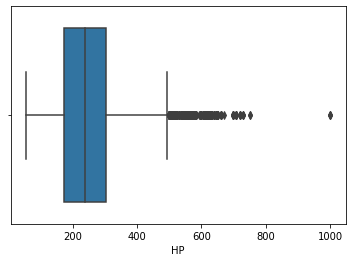

In [80]:
# Visualiza 
sns.boxplot(x=df2['HP'])

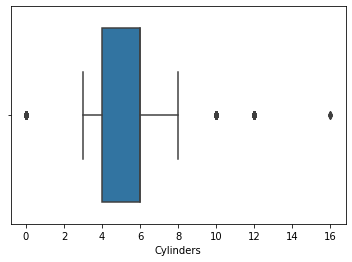

In [81]:
sns.boxplot(x=df2['Cylinders'])

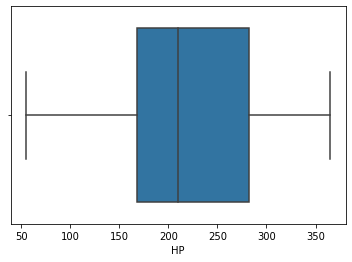

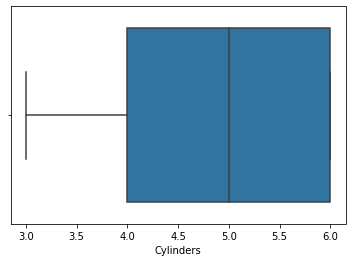

In [44]:
# Alternativa #2 - Plotear directamente desde df2

# Boxplot de HP sin outlines
sns.boxplot(x=df.loc[(df['HP'] >= out_inf['HP']) & (df['HP'] <= out_sup['HP']), 'HP'] );
plt.show()

# Boxplot de Cylinders sin outlines
sns.boxplot(x=df.loc[(df['Cylinders'] >= out_inf['Cylinders']) & (df['Cylinders'] <= out_sup['Cylinders']), 'Cylinders'] );
plt.show()


<font color='green'>Fin Actividad 2</font>



---



## <font color='blue'>**Dibujar diferentes características entre sí (dispersión), histogramas y mapas de calor**</font>

### Histograma

El histograma se refiere a la frecuencia de aparición de variables en un intervalo. En este caso, hay principalmente 10 tipos diferentes de empresas de fabricación de automóviles, pero a menudo es importante saber quién tiene la mayor cantidad de automóviles. Hacer este histograma es una de las soluciones triviales que nos permite conocer el número total de automóviles fabricados por otra empresa.

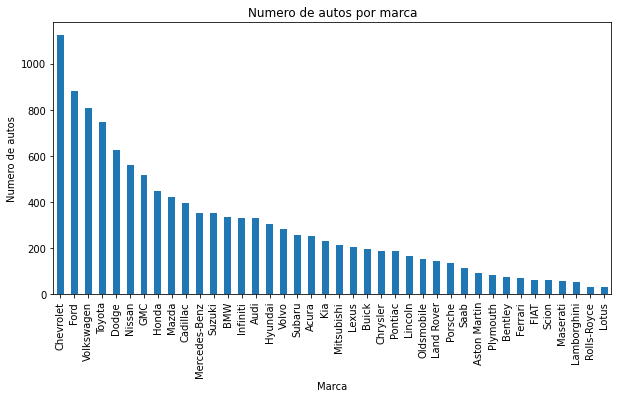

In [ ]:
# Tomamos el atributo fabricante (Make)
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Numero de autos por marca")
plt.ylabel('Numero de autos')
plt.xlabel('Marca')
plt.show()

(array([  33.,  117.,  338.,  459.,  748., 1022., 1343., 1077.,  773.,
         619.,  703.,  808.,  939.,  604.,  504.,  299.,  137.,  293.,
         105.,  223.,  113.,  105.,   42.,   28.,  119.,   39.,   98.,
          69.,   14.,   46.,   28.,   39.,    6.,    0.,   12.,    7.,
           2.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    3.]),
 array([  55.  ,   73.92,   92.84,  111.76,  130.68,  149.6 ,  168.52,
         187.44,  206.36,  225.28,  244.2 ,  263.12,  282.04,  300.96,
         319.88,  338.8 ,  357.72,  376.64,  395.56,  414.48,  433.4 ,
         452.32,  471.24,  490.16,  509.08,  528.  ,  546.92,  565.84,
         584.76,  603.68,  622.6 ,  641.52,  660.44,  679.36,  698.28,
         717.2 ,  736.12,  755.04,  773.96,  792.88,  811.8 ,  830.72,
         849.64,  868.56,  887.48,  906.4 ,  925.32,  944.24,  963.16,
         982.08, 1001.  ]),
 <a list of 50 Patch objects>)

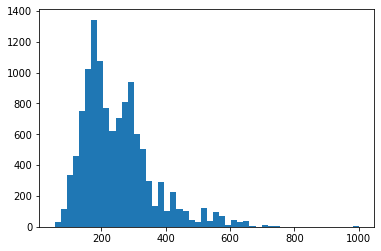

In [ ]:
plt.hist(df['HP'],50)

## <font color='green'>**Actividad 3**</font>
1. Construya el histograma para la variable HP. Qué puede concluir de este histograma?
2. Construya el histograma para ``df2`` (sin outliers). Compare.

TIP: Utilice distintos valores de bins

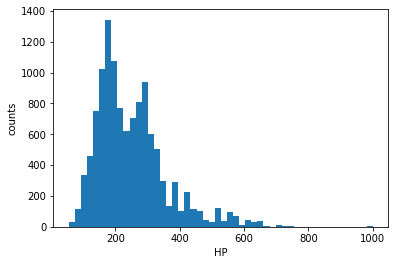

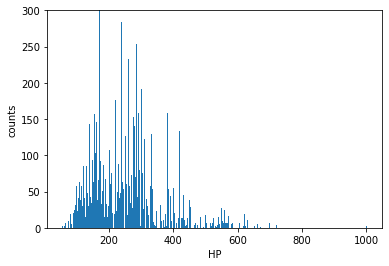

In [ ]:
# Tu código aquí ...
plt.hist(df['HP'], bins = 50)
plt.xlabel('HP')
plt.ylabel('counts')
plt.show()

plt.hist(df['HP'], bins = 500)
plt.xlabel('HP')
plt.ylabel('counts')
plt.ylim([0,300])
plt.show()

**_Conclusiones_**: Gran parte de los caballos de fuerza de los modelos son menores a los 400 HP, mientras que su valor máximo en el dataset es de 1000. Con respecto a la distribución, se aprecia como si fuera bi-modal, con un primer "peak" a los ~150 app, y un segundo "peak" de menor cantidad de datos a los ~300 app.

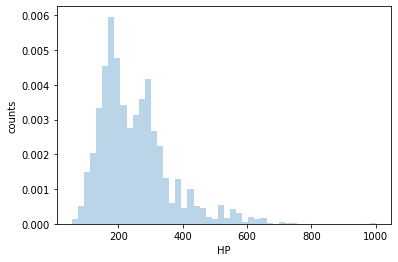

In [ ]:
plt.hist(df['HP'], bins = 50, alpha = 0.3)
# plt.hist(df2['HP'], bins = 50, alpha = 0.3, color = 'r')
plt.xlabel('HP')
plt.ylabel('counts')
plt.show()

# plt.hist(df['HP'], bins = 500)
# plt.hist(df2['HP'], bins = 500)
# plt.xlabel('HP')
# plt.ylabel('counts')
# plt.ylim([0,300])
# plt.show()

<font color='green'>Fin Actividad 3</font>

### Mapas de calor

El mapa de calor, es un tipo de gráfico que mide la relacion entre dos variables. Es necesario utilizar este diagrama para encontrar dependencia alta entre las variables. La dependencia alta entre variables,  puede impactar el desempeño de un algoritmo de aprendizaje automático. Una de las mejores formas de encontrar la relación entre las variables se puede realizar mediante mapas de calor. En el siguiente mapa de calor, sabemos que la función de precio depende principalmente de los caballos de fuerza y los cilindros.

In [ ]:
c = df.corr()
c.round(3)

,Year,HP,Cylinders,Number of Doors,MPG-H,MPG-C,Popularity,Price
Year,1.000,0.337,-0.027,0.246,0.266,0.220,0.087,0.209
HP,0.337,1.000,0.788,-0.129,-0.424,-0.475,0.041,0.659
Cylinders,-0.027,0.788,1.000,-0.148,-0.615,-0.635,0.042,0.552
Number of Doors,0.246,-0.129,-0.148,1.000,0.117,0.137,-0.059,-0.146
MPG-H,0.266,-0.424,-0.615,0.117,1.000,0.843,-0.025,-0.208
MPG-C,0.220,-0.475,-0.635,0.137,0.843,1.000,-0.007,-0.233
Popularity,0.087,0.041,0.042,-0.059,-0.025,-0.007,1.000,-0.048
Price,0.209,0.659,0.552,-0.146,-0.208,-0.233,-0.048,1.000


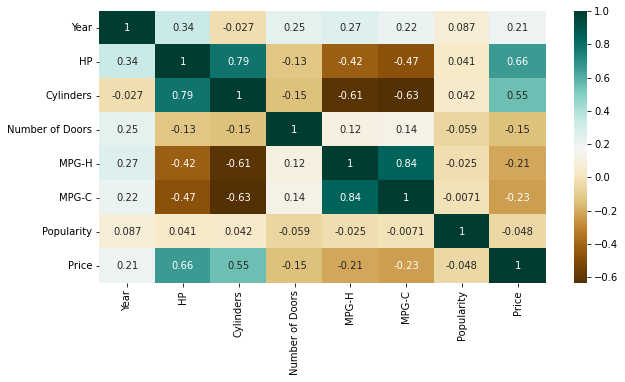

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(c,cmap="BrBG", annot=True)
plt.show()

### Scatterplot

Generalmente usamos diagramas de dispersión para encontrar la correlación visual entre dos variables. Aquí, los diagramas de dispersión se trazan entre Caballos de fuerza y Precio y podemos ver el diagrama a continuación. Con el gráfico que se muestra a continuación, podemos dibujar fácilmente una línea de tendencia. 

Tambien se aprecia que hay dos grupos que se comportan distinto. Es probable que si quisieramos construir un predictor, estos comportamientos habria que diferenciarlos o buscar otras variables que relacionaran los puntos del grupo inferior. 

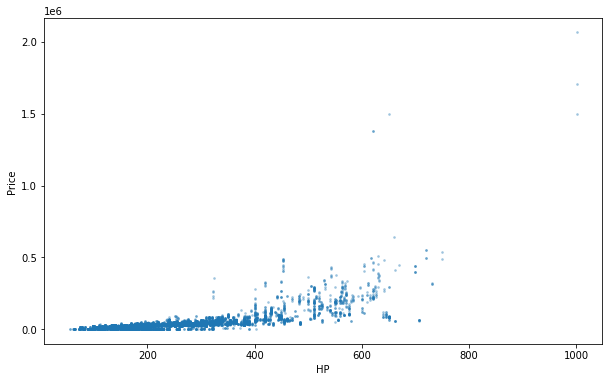

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'], alpha=0.3, s=3)
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

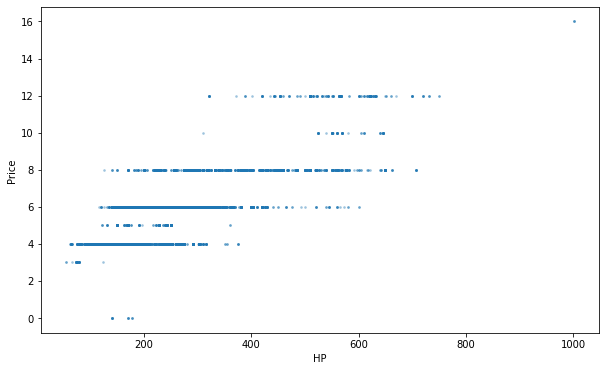

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Cylinders'], alpha=0.3, s=3)
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

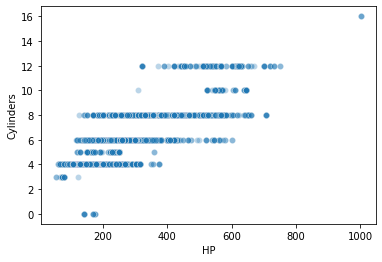

In [ ]:
sns.scatterplot(data=df, x='HP', y='Cylinders', alpha=0.3)
plt.show()